In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [ ]:
conn = sqlite3.connect('apex.db')
stmt = 'SELECT legend'

In [18]:
def bar(axes, query_loc, x, y, sort_by=None):
    """
    Can remove sort_by and make it so that it sorts by var y.
    """
    conn = sqlite3.connect('apex.db')
    stmt = open(query_loc)

    df = pd.read_sql_query(stmt.read(), conn)

    if sort_by:
        df = df.sort_values(by=sort_by, ascending=True)

    stmt.close()
    conn.close()

    for x_values, y_values in enumerate(df[y]):
        if y_values != 0:  # Adding text to say zero doesn't add more value to a chart
            axes.text(y_values, x_values - 0.4, y_values, color='orange')

    return axes.barh(df[x], df[y])

### Count of All Legends Played

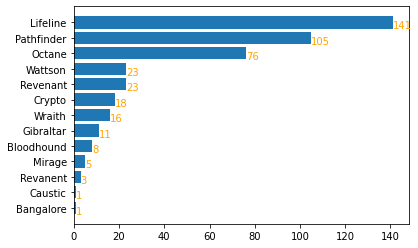

In [9]:
fig, ax = plt.subplots()
bar(ax, 'scripts/all-legends.txt', 'legend', 'count', sort_by='count')
plt.show()


### Damage and Kills By Legend

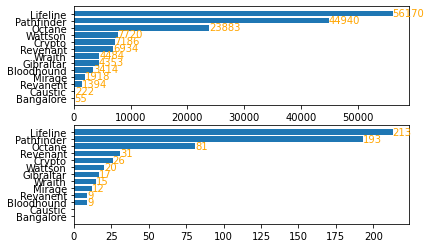

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1)
bar(ax1, 'scripts/legend-stats.txt', 'legend', 'damage', sort_by='damage')
bar(ax2, 'scripts/legend-stats.txt', 'legend', 'kills', sort_by='kills')
plt.show()

### Revives and Respawns by Legend

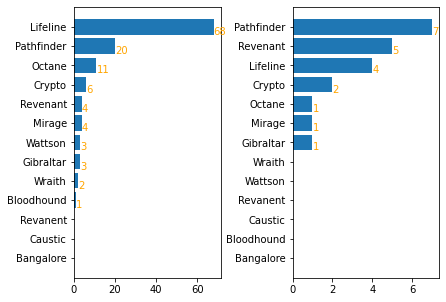

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)
bar(ax1, 'scripts/legend-stats.txt', 'legend', 'revives', sort_by='revives')
bar(ax2, 'scripts/legend-stats.txt', 'legend', 'respawns', sort_by='respawns')
fig.tight_layout(pad=0)
plt.show()

### Survival Time Data

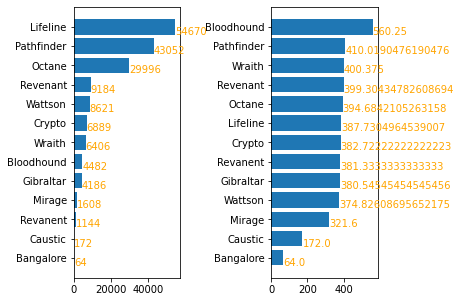

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2)
bar(ax1, 'scripts/legend-play-time.txt', 'legend', 'total_time', sort_by='total_time')
bar(ax2, 'scripts/legend-play-time.txt', 'legend', 'avg_time', sort_by='avg_time')
fig.tight_layout(pad=0)
plt.show()